In [2]:
import numpy as np

## Load Dataset

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
X = digits["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

### Visualize

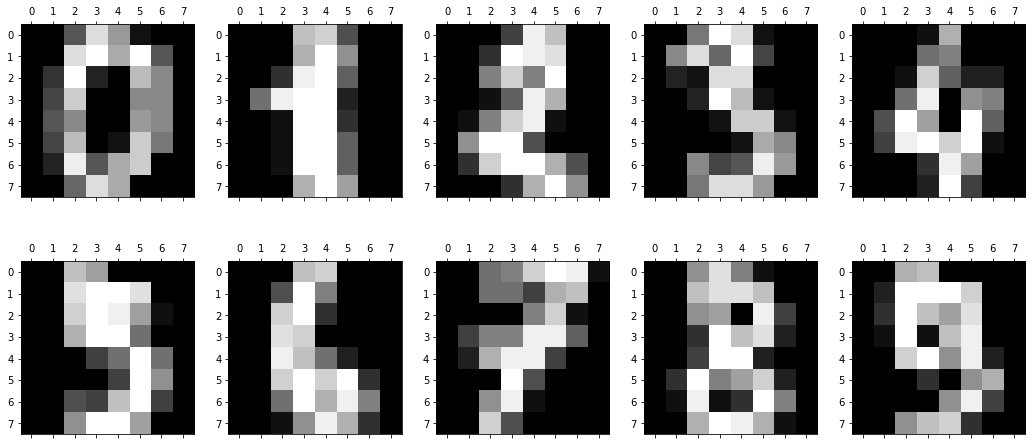

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X[0].reshape(8, 8))
axes[0][1].matshow(X[1].reshape(8, 8))
axes[0][2].matshow(X[2].reshape(8, 8))
axes[0][3].matshow(X[3].reshape(8, 8))
axes[0][4].matshow(X[4].reshape(8, 8))
axes[1][0].matshow(X[5].reshape(8, 8))
axes[1][1].matshow(X[6].reshape(8, 8))
axes[1][2].matshow(X[7].reshape(8, 8))
axes[1][3].matshow(X[8].reshape(8, 8))
axes[1][4].matshow(X[9].reshape(8, 8))

In [9]:
y = digits["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [10]:
X_mean = X.mean()

X_normalized = X - X_mean

X_normalized.mean(), X_normalized.min(), X_normalized.max()

(8.995463126623417e-17, -4.8841645798553142, 11.115835420144686)

In [11]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y.shape, y_hot.shape)

Using TensorFlow backend.
/Users/shaynekang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(1797,) (1797, 10)


## Define Activation

### Sigmoid

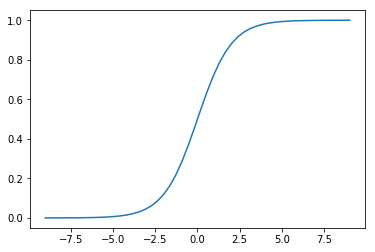

In [12]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

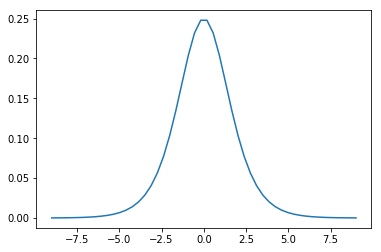

In [13]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### ReLU

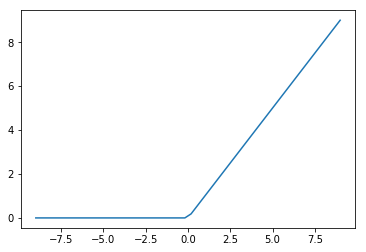

In [15]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

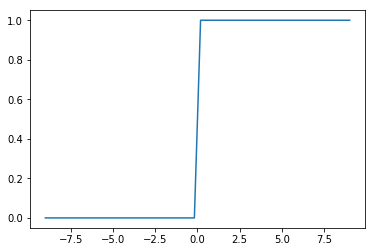

In [16]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

## Build a Model

### Small Random Number

In [17]:
from time import time

num_epoch = 100
learning_rate = 0.0001

errors_default = []

start = time()

w1 = np.random.uniform(low=-1.0, high=1.0, size=(64, 100))
w2 = np.random.uniform(low=-1.0, high=1.0, size=(100, 100))
w3 = np.random.uniform(low=-1.0, high=1.0, size=(100, 10))

b1 = np.zeros((1, 100))
b2 = np.zeros((1, 100))
b3 = np.zeros((1, 10))

for epoch in range(num_epoch):
    # Forward Propagation
    z1 = X.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(w3) + b3
    a3 = sigmoid(z3)
    
    y_predict = np.argmax(a3, axis=1)
    error = (y_predict != y).mean()
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
        
    errors_default.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    # Backpropagation
    d3 = (a3 - y_hot)
    d2 = d3.dot(w3.T) * sigmoid_derivative(z2)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    w3 = w3 - learning_rate * a2.T.dot(d3)
    b3 = b3 - learning_rate * d3.mean(axis=0)
    
    w2 = w2 - learning_rate * a1.T.dot(d2)
    b2 = b2 - learning_rate * d2.mean(axis=0)

    w1 = w1 - learning_rate * X.T.dot(d1)
    b1 = b1 - learning_rate * d1.mean(axis=0)

print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.88926
10 error = 0.56316
20 error = 0.37229
30 error = 0.27991
40 error = 0.22426
50 error = 0.19699
60 error = 0.17362
70 error = 0.15136
80 error = 0.13578
90 error = 0.12688
----------------------------------------
99 error = 0.11853


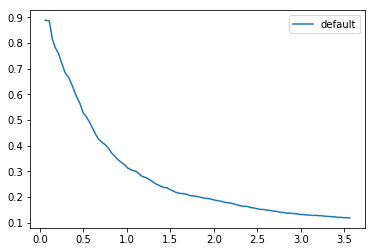

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

errors_default = pd.DataFrame(errors_default)

plt.plot(errors_default['elapsed'],
         errors_default['error'],
         label="default")

plt.legend()

### Xavior Initialization

In [18]:
from time import time

num_epoch = 100
learning_rate = 0.0001

errors_xavior = []

start = time()

w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                       high=+np.sqrt(6 / (64+100)),
                       size=(64, 100))

w2 = np.random.uniform(low=-np.sqrt(6 / (100+100)),
                       high=+np.sqrt(6 / (100+100)),
                       size=(100, 100))

w3 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                       high=+np.sqrt(6 / (100+10)),
                       size=(100, 10))

b1 = np.zeros((1, 100))
b2 = np.zeros((1, 100))
b3 = np.zeros((1, 10))

for epoch in range(num_epoch):
    # Forward Propagation
    z1 = X_normalized.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(w3) + b3
    a3 = sigmoid(z3)
    
    y_predict = np.argmax(a3, axis=1)
    error = (y_predict != y).mean()

    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
        
    errors_xavior.append({
        'epoch': epoch,
        'elapsed': time() - start,
        'error': error,
    })

    # Backpropagation
    d3 = (a3 - y_hot)
    d2 = d3.dot(w3.T) * sigmoid_derivative(z2)
    d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

    w3 = w3 - learning_rate * a2.T.dot(d3)
    b3 = b3 - learning_rate * d3.mean(axis=0)
    
    w2 = w2 - learning_rate * a1.T.dot(d2)
    b2 = b2 - learning_rate * d2.mean(axis=0)

    w1 = w1 - learning_rate * X_normalized.T.dot(d1)
    b1 = b1 - learning_rate * d1.mean(axis=0)

print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.90262
10 error = 0.42014
20 error = 0.24096
30 error = 0.16750
40 error = 0.14246
50 error = 0.12465
60 error = 0.10740
70 error = 0.09683
80 error = 0.09015
90 error = 0.08125
----------------------------------------
99 error = 0.07346


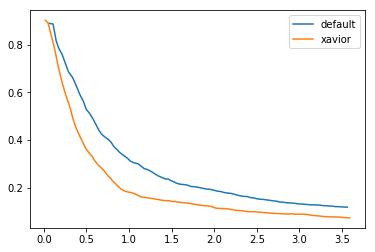

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

errors_default = pd.DataFrame(errors_default)
errors_xavior = pd.DataFrame(errors_xavior)

plt.plot(errors_default['elapsed'],
         errors_default['error'],
         label="default")

plt.plot(errors_xavior['elapsed'],
         errors_xavior['error'],
         label="xavior")

plt.legend()

## ReLU

In [ ]:
### 여기에 ReLU와 그에 맞는 weight initialization을 사용한 코드를 넣어주시면 됩니다.
### 이후 시각화를 통해 차이를 비교해주세요.